label: {0, 2, 15, 255}
pred: {0, 2, 14, 15}


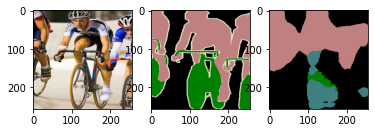

In [2]:
from fcn import FCN
import torch
from PIL import Image
import numpy as np
from torchvision.utils import make_grid
import pickle
import matplotlib.pyplot as plt 
net = FCN(upsample= "32", class_num= 21)
net.load_state_dict(torch.load("Training/0/best-FCN32.pth"))
net.eval()
with open("sample_set.p","rb") as f:
    img, label = pickle.load(f)
with open("palette.p","rb") as f:
    palette = pickle.load(f)
pred = net(img).squeeze(0)
pred = torch.argmax(pred,dim = 0)

plt.subplot(1,3,1)
norm_img = make_grid(img, normalize= True)
plt.imshow(norm_img.permute((1,2,0)))
plt.subplot(1,3,2)
label_arr = np.array(label, dtype= np.uint8).reshape(256,256)
print("label:",set(list(np.array(label,dtype=np.uint8).reshape(-1))))
label_img = Image.fromarray(label_arr)
label_img.putpalette(palette)
plt.imshow(label_img)
plt.subplot(1,3,3)
pred_img = Image.fromarray(np.array(pred,dtype=np.uint8).reshape(256,256))
print("pred:",set(list(np.array(pred,dtype=np.uint8).reshape(-1))))
pred_img.putpalette(palette)
plt.imshow(pred_img)
plt.savefig("Fig/compare32.png")

In [21]:
import pickle
with open("sample_set.p","wb") as f:
    pickle.dump([img,label], f)

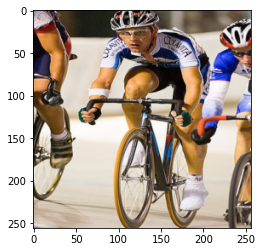

In [19]:
img,label= next(val_iter)
plt.imshow(make_grid(img,normalize= True).permute((1,2,0)))


In [1]:
from dataloader import getDataLoader
from torchvision.utils import make_grid
_, val_loader = getDataLoader(batch_size= 1, num_workers= 4)
val_iter = iter(val_loader)

Using downloaded and verified file: Datas/VOCtrainval_11-May-2012.tar
Using downloaded and verified file: Datas/VOCtrainval_11-May-2012.tar
